In [986]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sys

sys.path.append('../../music/')

import spotify_methods as sm

df = pd.read_csv('../data/spotify_data_smaller.csv')
df.head()

,Unnamed: 0,external_urls,href,name,id,artists,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,{'spotify': 'https://open.spotify.com/track/3j...,https://api.spotify.com/v1/tracks/3jjQHULAVn71...,Juicebox,3jjQHULAVn71k40mKwGMiV,[{'external_urls': {'spotify': 'https://open.s...,0.462,0.981,2,-2.371,...,0.0856,0.547,154.995,audio_features,3jjQHULAVn71k40mKwGMiV,spotify:track:3jjQHULAVn71k40mKwGMiV,https://api.spotify.com/v1/tracks/3jjQHULAVn71...,https://api.spotify.com/v1/audio-analysis/3jjQ...,194573,4
1,1,{'spotify': 'https://open.spotify.com/track/1a...,https://api.spotify.com/v1/tracks/1aOxOpH4AkGA...,Why Are Sundays So Depressing,1aOxOpH4AkGAd8OMrKjyNY,[{'external_urls': {'spotify': 'https://open.s...,0.579,0.714,0,-4.455,...,0.1110,0.299,109.971,audio_features,1aOxOpH4AkGAd8OMrKjyNY,spotify:track:1aOxOpH4AkGAd8OMrKjyNY,https://api.spotify.com/v1/tracks/1aOxOpH4AkGA...,https://api.spotify.com/v1/audio-analysis/1aOx...,275667,4
2,2,{'spotify': 'https://open.spotify.com/track/0K...,https://api.spotify.com/v1/tracks/0KzAbK6nItSq...,Where Is My Mind?,0KzAbK6nItSqNh8q70tb0K,[{'external_urls': {'spotify': 'https://open.s...,0.513,0.442,4,-13.529,...,0.0878,0.243,81.201,audio_features,0KzAbK6nItSqNh8q70tb0K,spotify:track:0KzAbK6nItSqNh8q70tb0K,https://api.spotify.com/v1/tracks/0KzAbK6nItSq...,https://api.spotify.com/v1/audio-analysis/0KzA...,229227,4
3,3,{'spotify': 'https://open.spotify.com/track/3N...,https://api.spotify.com/v1/tracks/3NfqN997u9A3...,All I Think About Now,3NfqN997u9A3YAAafgzhIa,[{'external_urls': {'spotify': 'https://open.s...,0.251,0.575,8,-7.819,...,0.1500,0.218,185.731,audio_features,3NfqN997u9A3YAAafgzhIa,spotify:track:3NfqN997u9A3YAAafgzhIa,https://api.spotify.com/v1/tracks/3NfqN997u9A3...,https://api.spotify.com/v1/audio-analysis/3Nfq...,187320,4
4,4,{'spotify': 'https://open.spotify.com/track/5r...,https://api.spotify.com/v1/tracks/5ruzrDWcT0vu...,The Adults Are Talking,5ruzrDWcT0vuJIOMW7gMnW,[{'external_urls': {'spotify': 'https://open.s...,0.593,0.749,5,-5.670,...,0.3140,0.649,164.959,audio_features,5ruzrDWcT0vuJIOMW7gMnW,spotify:track:5ruzrDWcT0vuJIOMW7gMnW,https://api.spotify.com/v1/tracks/5ruzrDWcT0vu...,https://api.spotify.com/v1/audio-analysis/5ruz...,309053,4


In [987]:
# Cleaning excel data
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['external_urls', 'id.1'], axis=1)

In [988]:
df[22:25]

,href,name,id,artists,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
22,https://api.spotify.com/v1/tracks/7nbAMKGkPMjc...,Neon Moon,7nbAMKGkPMjc4EuNNsjXqZ,[{'external_urls': {'spotify': 'https://open.s...,0.274,0.489,4,-11.102,1,0.0301,...,0.0946,0.1020,0.284,180.605,audio_features,spotify:track:7nbAMKGkPMjc4EuNNsjXqZ,https://api.spotify.com/v1/tracks/7nbAMKGkPMjc...,https://api.spotify.com/v1/audio-analysis/7nbA...,225767,4
23,https://api.spotify.com/v1/tracks/1l4pW7Tklvcc...,Touch,1l4pW7Tklvcc3k38rDFMkk,[{'external_urls': {'spotify': 'https://open.s...,0.484,0.500,6,-9.403,1,0.0241,...,0.9180,0.1020,0.369,95.996,audio_features,spotify:track:1l4pW7Tklvcc3k38rDFMkk,https://api.spotify.com/v1/tracks/1l4pW7Tklvcc...,https://api.spotify.com/v1/audio-analysis/1l4p...,292853,4
24,https://api.spotify.com/v1/tracks/1fDFHXcykq4i...,About You,1fDFHXcykq4iw8Gg7s5hG9,[{'external_urls': {'spotify': 'https://open.s...,0.416,0.762,2,-7.385,1,0.0279,...,0.8040,0.0559,0.461,95.967,audio_features,spotify:track:1fDFHXcykq4iw8Gg7s5hG9,https://api.spotify.com/v1/tracks/1fDFHXcykq4i...,https://api.spotify.com/v1/audio-analysis/1fDF...,326491,4


In [989]:
statistical_df = df.select_dtypes(include='number')
statistical_df = statistical_df.drop(['duration_ms'], axis=1)

statistical_df[22:25]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
22,0.274,0.489,4,-11.102,1,0.0301,0.0984,0.0946,0.1020,0.284,180.605,4
23,0.484,0.500,6,-9.403,1,0.0241,0.3660,0.9180,0.1020,0.369,95.996,4
24,0.416,0.762,2,-7.385,1,0.0279,0.3120,0.8040,0.0559,0.461,95.967,4


In [990]:
veat_df = statistical_df.filter(['energy', 'acousticness','instrumentalness', 'key', 'danceability'])
veat_df=(veat_df-veat_df.mean())/veat_df.std()

veat_df.head()


,energy,acousticness,instrumentalness,key,danceability
0,2.218127,-1.027260,-0.227110,-0.812758,-0.965192
1,0.781018,-1.024064,-0.124804,-1.368890,-0.211356
2,-0.683004,-1.007628,-0.273261,-0.256626,-0.636597
3,0.032859,-1.018956,-0.270344,0.855638,-2.324675
4,0.969403,-0.993764,0.325771,0.021440,-0.121153


In [991]:
veat_df['acousticness'] = veat_df['acousticness'] * 1000
veat_df['key'] = veat_df['key'] * .001

# veat_df['energy'] = veat_df['energy'] * 10000
veat_df['instrumentalness'] = veat_df['instrumentalness'] * .5

In [992]:
# Testing different parameters with different cluster sizes to see which one makes sense
clustering_kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=100, random_state=3425)
statistical_df['clustertotal'] = clustering_kmeans.fit_predict(statistical_df) # Testing with all attributes
veat_df['clusterveat'] = clustering_kmeans.fit_predict(veat_df) # Testing vlek
# vle_stat_df['clustervle'] = clustering_kmeans.fit_predict(vle_stat_df) # Testing vle

/Users/akhilkamalesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akhilkamalesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [993]:
df['clustertotal'] = statistical_df['clustertotal']
df['clusterveat'] = veat_df['clusterveat']
# df['clustervle'] = vle_stat_df['clustervle']
df.to_csv('clusteranalysis.csv')

<Axes: title={'center': 'Correlation with response variable'}>

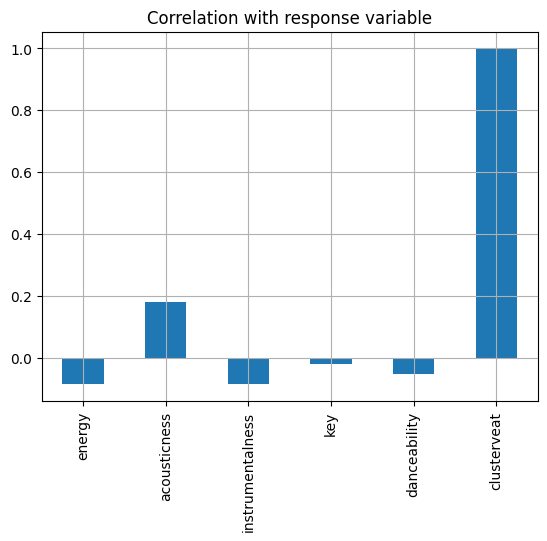

In [994]:
veat_df.head()
veat_df.corrwith(veat_df['clusterveat']).plot.bar(title='Correlation with response variable', grid=True)

In [995]:
# vle_stat_df.corrwith(vle_stat_df['clustervle']).plot.bar(title='Correlation with response variable', grid=True)

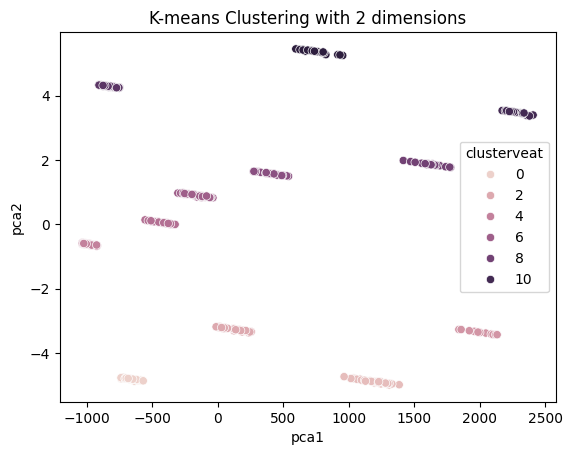

In [996]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(veat_df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=veat_df['clusterveat'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()